<a href="https://colab.research.google.com/github/Drit92/Mask_Products_Analysis/blob/main/Top_Selling_Masks_Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Products

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
prod = pd.read_csv("/content/products.tsv", sep="\t")

In [ ]:
prod.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks


In [ ]:
prod.shape

(27, 7)

In [ ]:
prod.columns

Index(['product_id', 'product_name', 'product_price', 'price_currency',
       'product_availability', 'product_url', 'source_url'],
      dtype='object')

In [ ]:
prod['product_availability'].value_counts()

,count
product_availability,
http://schema.org/InStock,27


In [ ]:
prod['source_url'].value_counts()

,count
source_url,
https://au.iherb.com/c/protective-face-masks,27


In [ ]:
prod['price_currency'].value_counts()

,count
price_currency,
AUD,27


In [ ]:
prod['product_price'].value_counts()

,count
product_price,
6.85,5
2.95,3
17.72,3
22.44,2
8.86,1
15.35,1
50.19,1
6.61,1
5.61,1


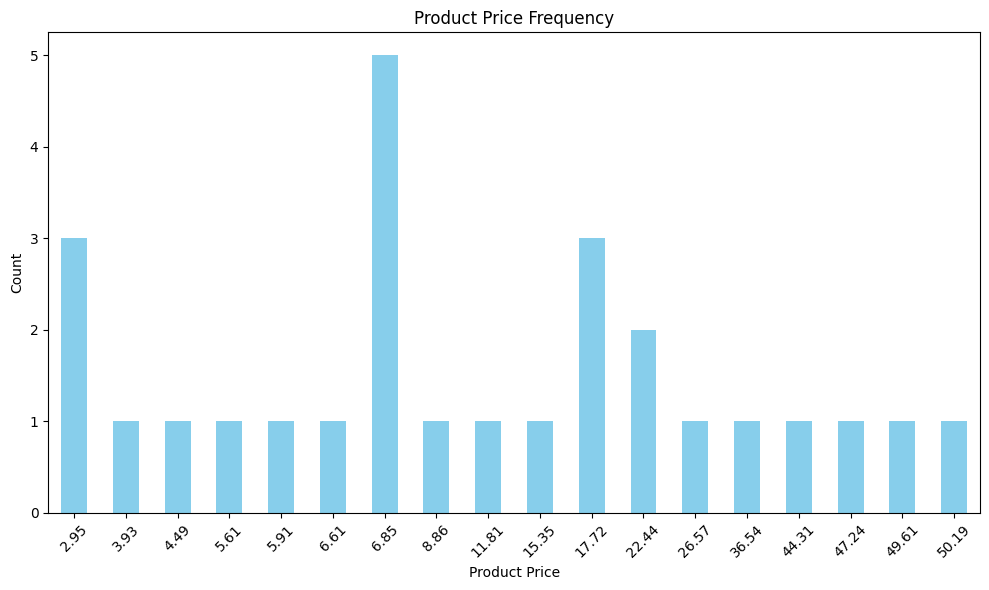

In [ ]:
price_counts = prod['product_price'].value_counts().sort_index()
price_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Product Price Frequency')
plt.xlabel('Product Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
prod2 = prod.drop(['product_availability','price_currency','source_url'], axis=1) #since all are same values
prod2.columns

Index(['product_id', 'product_name', 'product_price', 'product_url'], dtype='object')

In [ ]:
prod2.shape

(27, 4)

In [ ]:
# Finding out tthe no. of unique products
print(len(prod['product_id'].value_counts()))

27


# Reviews

In [ ]:
rev = pd.read_csv("/content/reviews.tsv", sep="\t")

In [ ]:
# Combining all revs text in english

rev_text =rev[['productId', 'reviewText','translation.reviewText','reviewTitle','translation.reviewTitle']].copy()
rev_text.loc[:,'eng_reviewText']= rev_text['translation.reviewText'].fillna(rev_text['reviewText'])
rev_text.loc[:,'eng_reviewTitle']= rev_text['translation.reviewTitle'].fillna(rev_text['reviewTitle'])
rev_text =rev_text[['productId','eng_reviewText','eng_reviewTitle' ]]

In [ ]:
rev_text.columns

Index(['productId', 'eng_reviewText', 'eng_reviewTitle'], dtype='object')

In [ ]:
rev_text.head()

,productId,eng_reviewText,eng_reviewTitle
0,103839,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice
1,103839,The grandson really liked it. Comfortable mask.,en-US
2,103839,Easy to put on & comfortable to wear.,Good
3,103839,A thin mask that is pleasant to the body. I li...,en-US
4,103839,Great mask! It suited me perfectly. There is a...,en-US


# Q1. Popular products

In [ ]:
rev_text.shape

(3849, 3)

In [ ]:
# Finding 3 most polpular products
rev_text['productId'].value_counts().head(3)

,count
productId,
101955,658
100237,530
99830,475


In [ ]:
#select only popular revs
pop_revs = rev_text[rev_text['productId'].isin([101955,100237,99830])]
pop_revs['productId'].value_counts()

,count
productId,
101955,658
100237,530
99830,475


In [ ]:
prod_id_rev = rev['productId'].value_counts()
prod_id_rev

,count
productId,
101955,658
100237,530
99830,475
102734,337
99829,304
101692,259
100837,225
101774,168
100541,145


In [ ]:
prod_id_df = prod_id_rev.reset_index()
prod_id_df.columns=['productId','count']
prod_id_merge = pd.merge(prod_id_df, prod2[['product_id', 'product_name']], left_on='productId',
                         right_on='product_id', how='left')
prod_id_merge.drop('product_id',axis=1,inplace=True)
prod_id_merge.index = prod_id_merge.index + 1

prod_id_merge  #.head(3)

,productId,count,product_name
1,101955,658,"SunJoy, KN95, Professional Protective Disposab..."
2,100237,530,"Kitsch, 100% Cotton Reuseable Face Masks, Leop..."
3,99830,475,"Kosette, Nano Reusable Face Protection Mask, M..."
4,102734,337,"Zidian, Disposable Protective Mask, 50 Pack"
5,99829,304,"Kosette, Nano Reusable Face Protection Mask, L..."
6,101692,259,"Kitsch, 100% Cotton Reusable Face Masks, Neutr..."
7,100837,225,"La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2..."
8,101774,168,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ..."
9,100541,145,"Tony Moly, CTT KN95 Respirator Mask, 5 Count"
10,103205,126,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ..."


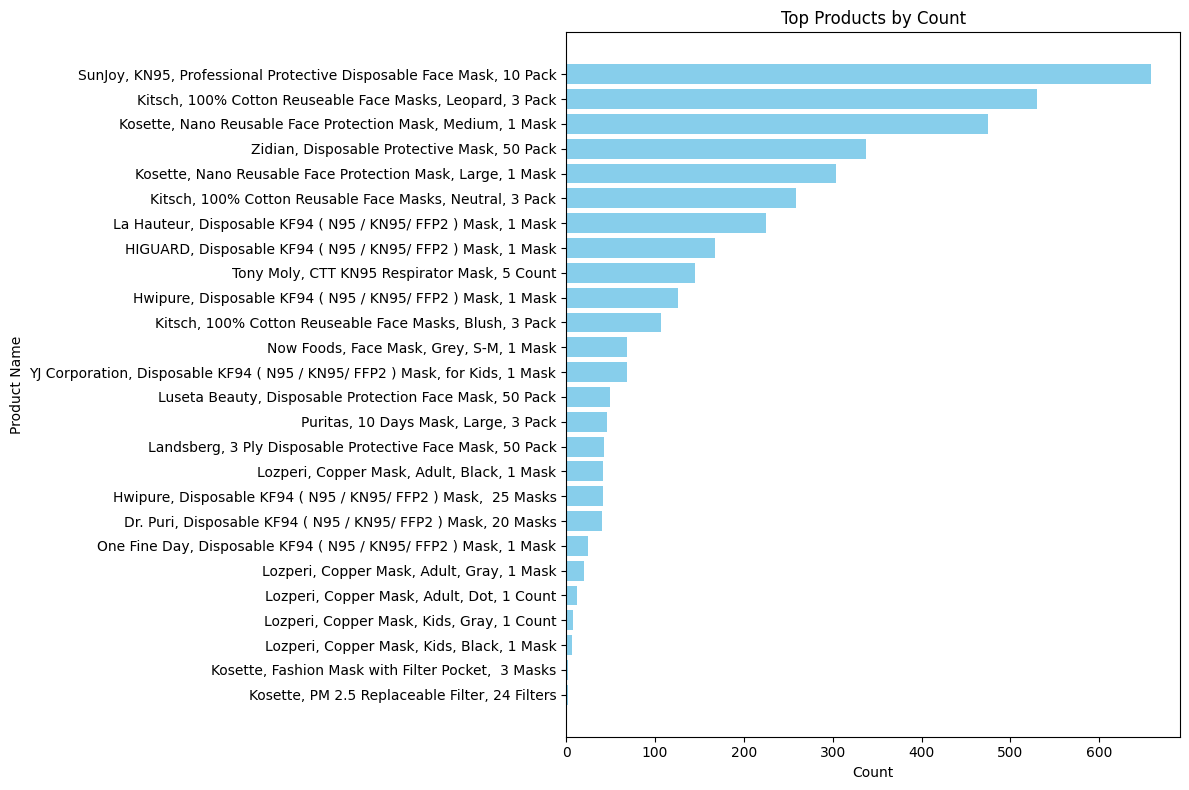

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(prod_id_merge['product_name'], prod_id_merge['count'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top Products by Count')
plt.tight_layout()
plt.show()


# Q2. Features of the popular products

In [ ]:
!pip install pandas spacy sklearn bertopic
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
df = pop_revs

In [ ]:
#Preprocessing
def preprocess(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc
              if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

df['clean_review'] = df['eng_reviewText'].astype(str).apply(preprocess)


/tmp/ipython-input-2691519272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['eng_reviewText'].astype(str).apply(preprocess)


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

def extract_keywords(texts, top_n=15):
    vec = CountVectorizer(max_features=2000, ngram_range=(1,2))
    X = vec.fit_transform(texts)
    sums = X.sum(axis=0)
    keywords = [(word, sums[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return [kw for kw, count in sorted_keywords[:top_n]]

def extract_topics(texts, top_n=10):
    topic_model = BERTopic(language="english", calculate_probabilities=False)
    topics, _ = topic_model.fit_transform(texts)
    result = topic_model.get_topic_freq().head(top_n)
    topic_keywords = []
    for topic_id in list(result['Topic']):
        if topic_id == -1:
            continue
        words = topic_model.get_topic(topic_id)
        topic_keywords.append([word for word, _ in words])
    return topic_keywords

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
products = df['productId'].unique()
product_features = {}

for pid in products:
    texts = df[df['productId'] == pid]['clean_review'].tolist()
    keywords = extract_keywords(texts, top_n=15)
    topics = extract_topics(texts, top_n=5)

    product_features[pid] = {
        "keywords": keywords,
        "topics": topics
    }


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Top keywords for each popular product
for pid, feats in product_features.items():
    print(f"Product ID: {pid}")
    print(f"Top keywords: {feats['keywords']}")
    print("Topics (key words):")
    for topic in feats['topics']:
        print("  ", topic)
    print("="*40)



Product ID: 99830
Top keywords: ['mask', 'comfortable', 'fit', 'face', 'breathe', 'wear', 'good', 'size', 'like', 'wash', 'nose', 'buy', 'ear', 'easy', 'adjustable']
Topics (key words):
   ['mask', 'face', 'fit', 'breathe', 'size', 'comfortable', 'wear', 'nose', 'like', 'ear']
   ['quality', 'protection', 'excellent', 'product', 'buy', 'order', 'pe', 'recommend', 'good', 'use']
   ['excellent', 'good', 'love', 'perfect', 'sweet', 'work', 'delicious', 'gooooooood', 'tidy', 'soo']
   ['comfortable', 'wear', 'sew', 'amazingly', 'surprising', 'fabric', 'excellent', 'fit', 'crowded', 'discomfort']
   ['wash', 'husband', 'comfortable', 'washable', 'use', 'wear', 'practical', 'new', 'month', 'find']
Product ID: 100237
Top keywords: ['mask', 'small', 'good', 'face', 'comfortable', 'fabric', 'great', 'size', 'wash', 'nice', 'fit', 'cotton', 'like', 'wear', 'breathe']
Topics (key words):
   ['mask', 'small', 'face', 'comfortable', 'good', 'fabric', 'size', 'great', 'wash', 'nice']
   ['good', 'h

# Q2. Trial 2

In [ ]:
!pip install transformers torch sentencepiece nltk
import pandas as pd
import torch
from transformers import pipeline, AutoTokenizer, AutoModel
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from collections import defaultdict, Counter
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Torekhan/absa-sentiment")
model = AutoModel.from_pretrained("Torekhan/absa-sentiment")
pipe = pipeline("feature-extraction", model=model, tokenizer=tokenizer)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/937 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def extract_aspect_embeddings(review):
    sentences = sent_tokenize(str(review))
    outputs = []
    for sent in sentences:
        emb = pipe(sent)
        sent_emb = torch.tensor(emb).mean(dim=1).squeeze().tolist()
        outputs.append((sent, sent_emb))
    return outputs


In [ ]:
df['sentence_embeddings'] = df['eng_reviewText'].apply(extract_aspect_embeddings)
product_ids = df['productId'].unique()

# print sentences and embeddings for first review of that product
for pid in product_ids:
    sample = df[df['productId'] == pid].iloc[0]
    print(f"Product ID: {pid}")
    print("Sentence and corresponding embedding vector (first review for this product):")
    for sent, emb in sample['sentence_embeddings']:
        print(f"Sentence: {sent}")
        print(f"Embedding vector (first 5 values): {emb[:5]}")
        print("----")
    print("="*60)


Product ID: 99830
Sentence and corresponding embedding vector (first review for this product):
Sentence: Very good protection due to five nano layers, while you can breathe.
Embedding vector (first 5 values): [-0.8498877286911011, 0.2680579423904419, 0.022543959319591522, 0.3668929934501648, 0.49171602725982666]
----
Sentence: It fits perfectly - there is a metal insert on the nose, so it sits completely in shape.
Embedding vector (first 5 values): [-0.9243282079696655, 0.21295906603336334, -0.1503075212240219, 0.5058403611183167, 0.5693308115005493]
----
Sentence: Behind the ears there are carabiners that regulate the size - much better than the elastic bands from which everything hurts.
Embedding vector (first 5 values): [-0.6280542612075806, -0.6208453178405762, -0.14573204517364502, -0.11950863897800446, -0.5346347093582153]
----
Sentence: The mask has a good cut, covers everything and even under the chin to the neck.
Embedding vector (first 5 values): [-0.7842561602592468, -0.5873

# Trial 3

In [ ]:
feature_extractor = pipeline("feature-extraction", model=model, tokenizer=tokenizer)
sentiment_analyzer = pipeline("sentiment-analysis")

def extract_aspect_embeddings(review):
    sentences = sent_tokenize(str(review))
    embeddings = []
    for sent in sentences:
        emb = feature_extractor(sent)
        sent_emb = torch.tensor(emb).mean(dim=1).squeeze().tolist()
        embeddings.append((sent, sent_emb))
    return embeddings

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
# sentiment analysis to find positive reviews
sentiment_results = sentiment_analyzer(df['eng_reviewText'].tolist())
df['sentiment_label'] = [res['label'] for res in sentiment_results]
df['sentiment_score'] = [res['score'] for res in sentiment_results]

positive_reviews = df[df['sentiment_label'] == 'POSITIVE']


In [ ]:
positive_reviews['sentence_embeddings'] = positive_reviews['eng_reviewText'].apply(extract_aspect_embeddings)

# print the sentence and embeddings for positive reviews
product_ids = positive_reviews['productId'].unique()
for pid in product_ids:
    sample = positive_reviews[positive_reviews['productId'] == pid].iloc[0]
    print(f"Product ID: {pid}")
    print("Sentences and corresponding embedding vectors (first positive review):")
    for sent, emb in sample['sentence_embeddings']:
        print(f"Sentence: {sent}")
        print(f"Embedding vector (first 5 values): {emb[:5]}")
        print("----")
    print("="*60)


Product ID: 99830
Sentences and corresponding embedding vectors (first positive review):
Sentence: Very good protection due to five nano layers, while you can breathe.
Embedding vector (first 5 values): [-0.8498877286911011, 0.2680579423904419, 0.022543959319591522, 0.3668929934501648, 0.49171602725982666]
----
Sentence: It fits perfectly - there is a metal insert on the nose, so it sits completely in shape.
Embedding vector (first 5 values): [-0.9243282079696655, 0.21295906603336334, -0.1503075212240219, 0.5058403611183167, 0.5693308115005493]
----
Sentence: Behind the ears there are carabiners that regulate the size - much better than the elastic bands from which everything hurts.
Embedding vector (first 5 values): [-0.6280542612075806, -0.6208453178405762, -0.14573204517364502, -0.11950863897800446, -0.5346347093582153]
----
Sentence: The mask has a good cut, covers everything and even under the chin to the neck.
Embedding vector (first 5 values): [-0.7842561602592468, -0.5873168706

In [ ]:

positive_reviews['sentence_embeddings'] = positive_reviews['eng_reviewText'].apply(extract_aspect_embeddings)

# Filter out unwated reviews
exclude_phrases_by_product = {
    100237: ["I hope my review will be useful, if so, please like it 👍","I recommend to everyone!"],
    101955: ["The only thing is that you can&#39;t tighten it on your chin, the mask has a special shape"],
    99830: ["I recommend taking two at once for a shift.","For men, it is better to take a size larger!" ]
}

def filter_sentence_embeddings(row):
    pid = row['productId']
    exclude_phrases = exclude_phrases_by_product.get(pid, [])
    filtered = [(sent, emb) for sent, emb in row['sentence_embeddings'] if sent not in exclude_phrases]
    return filtered

positive_reviews['sentence_embeddings'] = positive_reviews.apply(filter_sentence_embeddings, axis=1)

# print reviews
product_ids = positive_reviews['productId'].unique()
for pid in product_ids:
    sample = positive_reviews[positive_reviews['productId'] == pid].iloc[0]
    print(f"Product ID: {pid}")
    print("Sentences and corresponding embedding vectors (first positive review):")
    for sent, emb in sample['sentence_embeddings']:
        print(f"Sentence: {sent}")
        print(f"Embedding vector (first 5 values): {emb[:5]}")
        print("----")
    print("="*60)


Product ID: 99830
Sentences and corresponding embedding vectors (first positive review):
Sentence: Very good protection due to five nano layers, while you can breathe.
Embedding vector (first 5 values): [-0.8498877286911011, 0.2680579423904419, 0.022543959319591522, 0.3668929934501648, 0.49171602725982666]
----
Sentence: It fits perfectly - there is a metal insert on the nose, so it sits completely in shape.
Embedding vector (first 5 values): [-0.9243282079696655, 0.21295906603336334, -0.1503075212240219, 0.5058403611183167, 0.5693308115005493]
----
Sentence: Behind the ears there are carabiners that regulate the size - much better than the elastic bands from which everything hurts.
Embedding vector (first 5 values): [-0.6280542612075806, -0.6208453178405762, -0.14573204517364502, -0.11950863897800446, -0.5346347093582153]
----
Sentence: The mask has a good cut, covers everything and even under the chin to the neck.
Embedding vector (first 5 values): [-0.7842561602592468, -0.5873168706

In [ ]:
type(sample)

pandas.core.series.Series

In [ ]:
positive_reviews.columns

Index(['productId', 'eng_reviewText', 'eng_reviewTitle', 'clean_review',
       'sentence_embeddings', 'sentiment_label', 'sentiment_score'],
      dtype='object')

In [ ]:
positive_reviews['productId'].value_counts()

,count
productId,
101955,498
100237,392
99830,367


# Vizualization

In [ ]:
!pip install circlify

In [ ]:
import circlify
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from collections import Counter
import textwrap

def wrap_text(text, width=16):
    return "<br>".join(textwrap.wrap(text, width=width))

product_phrases = {}
for pid in positive_reviews['productId'].unique():
    sample = positive_reviews[positive_reviews['productId'] == pid].iloc[0]
    phrases = [sent for sent, emb in sample['sentence_embeddings']]
    phrase_counts = Counter(phrases)
    product_phrases[pid] = phrase_counts

def plot_packed_bubbles_wrapped(phrase_counts, product_id):
    df_vis = pd.DataFrame({
        'phrase': list(phrase_counts.keys()),
        'count': list(phrase_counts.values())
    })

    circles = circlify.circlify(
        df_vis['count'].tolist(),
        show_enclosure=False,
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

    x = [c.x for c in circles]
    y = [c.y for c in circles]
    r = [c.r for c in circles]

    max_diameter = 350
    sizes = [max_diameter * radius * 2 for radius in r]


    mint_colors = [
        "rgba(189, 252, 201, 0.3)",
        "rgba(164, 244, 208, 0.25)",
        "rgba(139, 237, 205, 0.2)",
        "rgba(114, 232, 202, 0.15)",
        "rgba(89, 228, 199, 0.1)"
    ]

    fig = go.Figure()

    for i, row in df_vis.iterrows():
        wrapped_phrase = wrap_text(row['phrase'], width=16)
        font_size = max(8, sizes[i] // 15)


        color = mint_colors[i % len(mint_colors)]

        fig.add_trace(go.Scatter(
            x=[x[i]],
            y=[y[i]],
            mode='markers+text',
            marker=dict(
                size=sizes[i],
                color=color,
                line=dict(width=0),
                sizemode='diameter',   #outer circle glow effect
                showscale=False,

            ),
            text=[wrapped_phrase],
            textposition='middle center',
            textfont=dict(
                size=font_size,
                color='black',
                family='Arial'
            ),
            hoverinfo='text',
            hovertext=f"{row['phrase']}<br>Count: {row['count']}"
        ))


        glow_size = sizes[i] * 1.4
        fig.add_trace(go.Scatter(
            x=[x[i]],
            y=[y[i]],
            mode='markers',
            marker=dict(
                size=glow_size,
                color=color.replace('0.3','0.1'),
                line=dict(width=0),
                sizemode='diameter',
                showscale=False,
            ),
            hoverinfo='skip',
            showlegend=False
        ))

    fig.update_layout(
        title=f"Packed Key Feature Bubbles for Product ID {product_id}",
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.5, 1.5]),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-1.5, 1.5]),
        width=950,
        height=950,
        showlegend=False,
        paper_bgcolor='rgba(224, 255, 241, 0.4)',
        plot_bgcolor='rgba(224, 255, 241, 0.4)',
        margin=dict(t=50, b=0, l=0, r=0),
    )

    fig.show()

for pid, phrase_counts in product_phrases.items():
    plot_packed_bubbles_wrapped(phrase_counts, pid)


# Q3. Customers profile

In [ ]:
rev.columns

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle'],
      dtype='object')

In [ ]:
rev.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


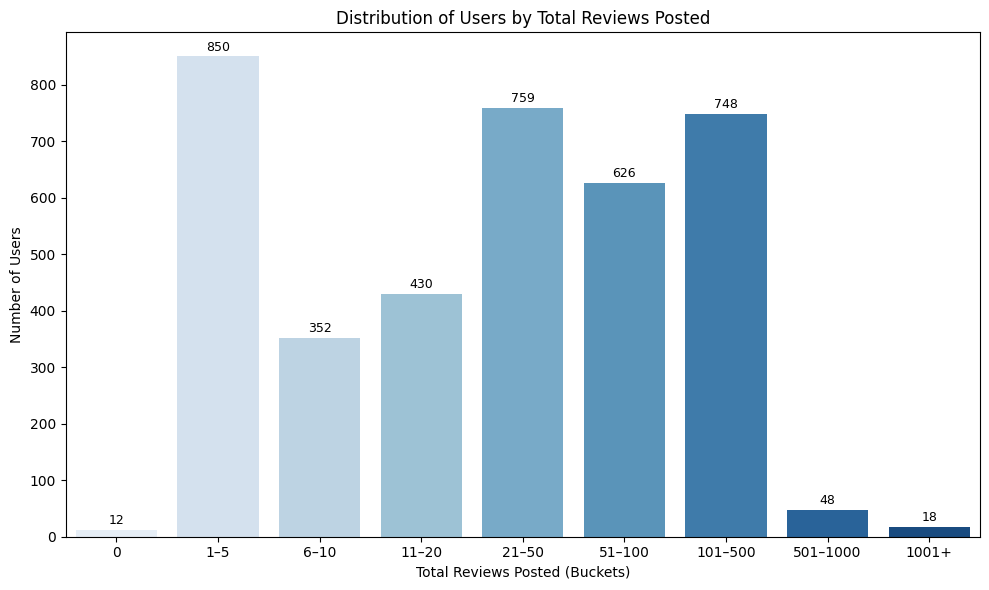

In [ ]:
import seaborn as sns

# Define buckets
bins = [0, 0.1, 5, 10, 20, 50, 100, 500, 1000, float('inf')]
labels = ['0', '1–5', '6–10', '11–20', '21–50', '51–100', '101–500', '501–1000', '1001+']

# Assign bucket to each review count
rev['review_bucket'] = pd.cut(rev['profileInfo.ugcSummary.reviewCount'], bins=bins, labels=labels, include_lowest=True)

# Count users in each bucket
bucket_counts = rev['review_bucket'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(bucket_counts))
bars = sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette=colors)

# Use values from bucket_counts directly for annotation
for i, count in enumerate(bucket_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

# Axis labels and title
plt.xlabel('Total Reviews Posted (Buckets)')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Total Reviews Posted')
plt.tight_layout()
plt.show()


In [ ]:
customers = rev[['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount']].copy()

In [ ]:
# Combining all revs text in english

rev_text =rev[['productId', 'reviewText','translation.reviewText','reviewTitle','translation.reviewTitle']].copy()
rev_text.loc[:,'eng_reviewText']= rev_text['translation.reviewText'].fillna(rev_text['reviewText'])
rev_text.loc[:,'eng_reviewTitle']= rev_text['translation.reviewTitle'].fillna(rev_text['reviewTitle'])
rev_text =rev_text[['productId','eng_reviewText','eng_reviewTitle' ]]

In [ ]:
rev['languageCode'].value_counts()

,count
languageCode,
en-US,1855
ru-RU,1300
ar-SA,227
he-IL,167
ja-JP,121
fr-FR,102
zh-TW,19
ko-KR,19
es-MX,14


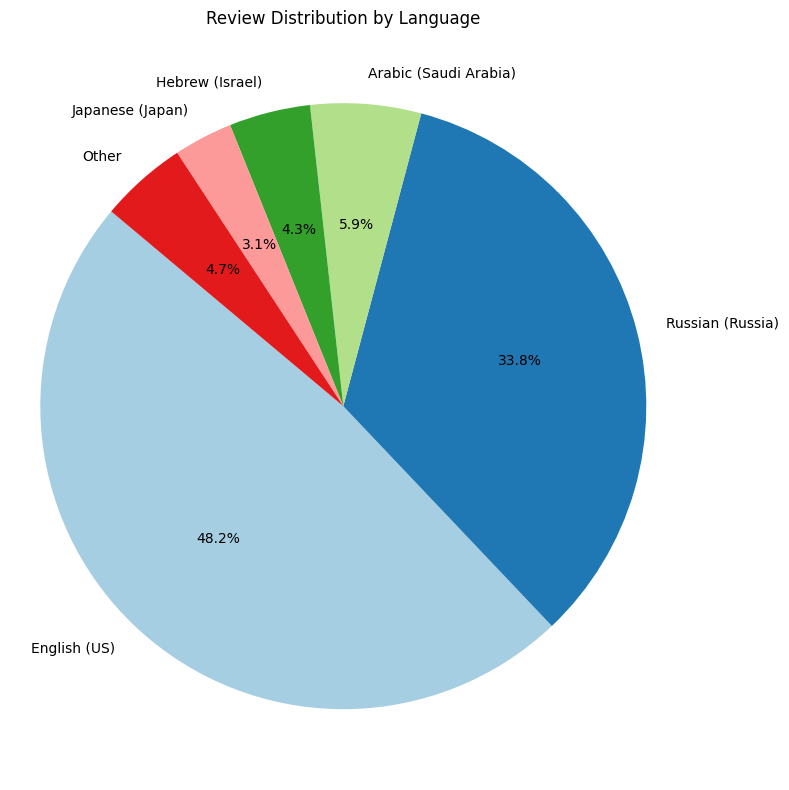

In [ ]:
lang_map = {
    'en-US': 'English (US)',
    'ru-RU': 'Russian (Russia)',
    'ar-SA': 'Arabic (Saudi Arabia)',
    'he-IL': 'Hebrew (Israel)',
    'ja-JP': 'Japanese (Japan)',
    'fr-FR': 'French (France)',
    'zh-TW': 'Chinese (Taiwan)',
    'ko-KR': 'Korean (South Korea)',
    'es-MX': 'Spanish (Mexico)',
    'zh-CN': 'Chinese (Simplified)',
    'de-DE': 'German (Germany)',
    'pt-BR': 'Portuguese (Brazil)'
}

# Step 2: Replace language codes with readable names
rev['language_readable'] = rev['languageCode'].map(lang_map).fillna(rev['languageCode'])

# Step 3: Count reviews by readable language name
language_counts = rev['language_readable'].value_counts()

# Optional: show only top N languages, group the rest into 'Other'
top_n = 5
if len(language_counts) > top_n:
    top_languages = language_counts[:top_n]
    other_count = language_counts[top_n:].sum()
    language_counts = pd.concat([top_languages, pd.Series({'Other': other_count})])

# Step 4: Plot the pie chart with readable names
plt.figure(figsize=(8, 8))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Review Distribution by Language')
plt.axis('equal')  # Keep pie chart circular
plt.tight_layout()
plt.show()


In [ ]:
grouped = rev.groupby(['languageCode', 'productId']).size().reset_index(name='review_count')
grouped = grouped.merge(prod2[['product_id', 'product_name']], left_on='productId', right_on='product_id', how='left')
grouped_sorted = grouped.sort_values(['languageCode', 'review_count'], ascending=[True, False])
top3 = grouped_sorted.groupby('languageCode').head(3)
top3['rank'] = top3.groupby('languageCode').cumcount() + 1

top3_table = top3[['languageCode', 'rank', 'product_name', 'review_count']]
top3_table


,languageCode,rank,product_name,review_count
1,ar-SA,1,"Kosette, Nano Reusable Face Protection Mask, M...",50
0,ar-SA,2,"Kosette, Nano Reusable Face Protection Mask, L...",28
4,ar-SA,3,"Kitsch, 100% Cotton Reuseable Face Masks, Leop...",27
22,de-DE,1,"Tony Moly, CTT KN95 Respirator Mask, 5 Count",3
25,de-DE,2,"SunJoy, KN95, Professional Protective Disposab...",3
20,de-DE,3,"Kosette, Nano Reusable Face Protection Mask, L...",2
30,en-US,1,"Kitsch, 100% Cotton Reuseable Face Masks, Leop...",308
39,en-US,2,"SunJoy, KN95, Professional Protective Disposab...",286
27,en-US,3,"Kosette, Nano Reusable Face Protection Mask, M...",199
54,es-MX,1,"Luseta Beauty, Disposable Protection Face Mask...",2


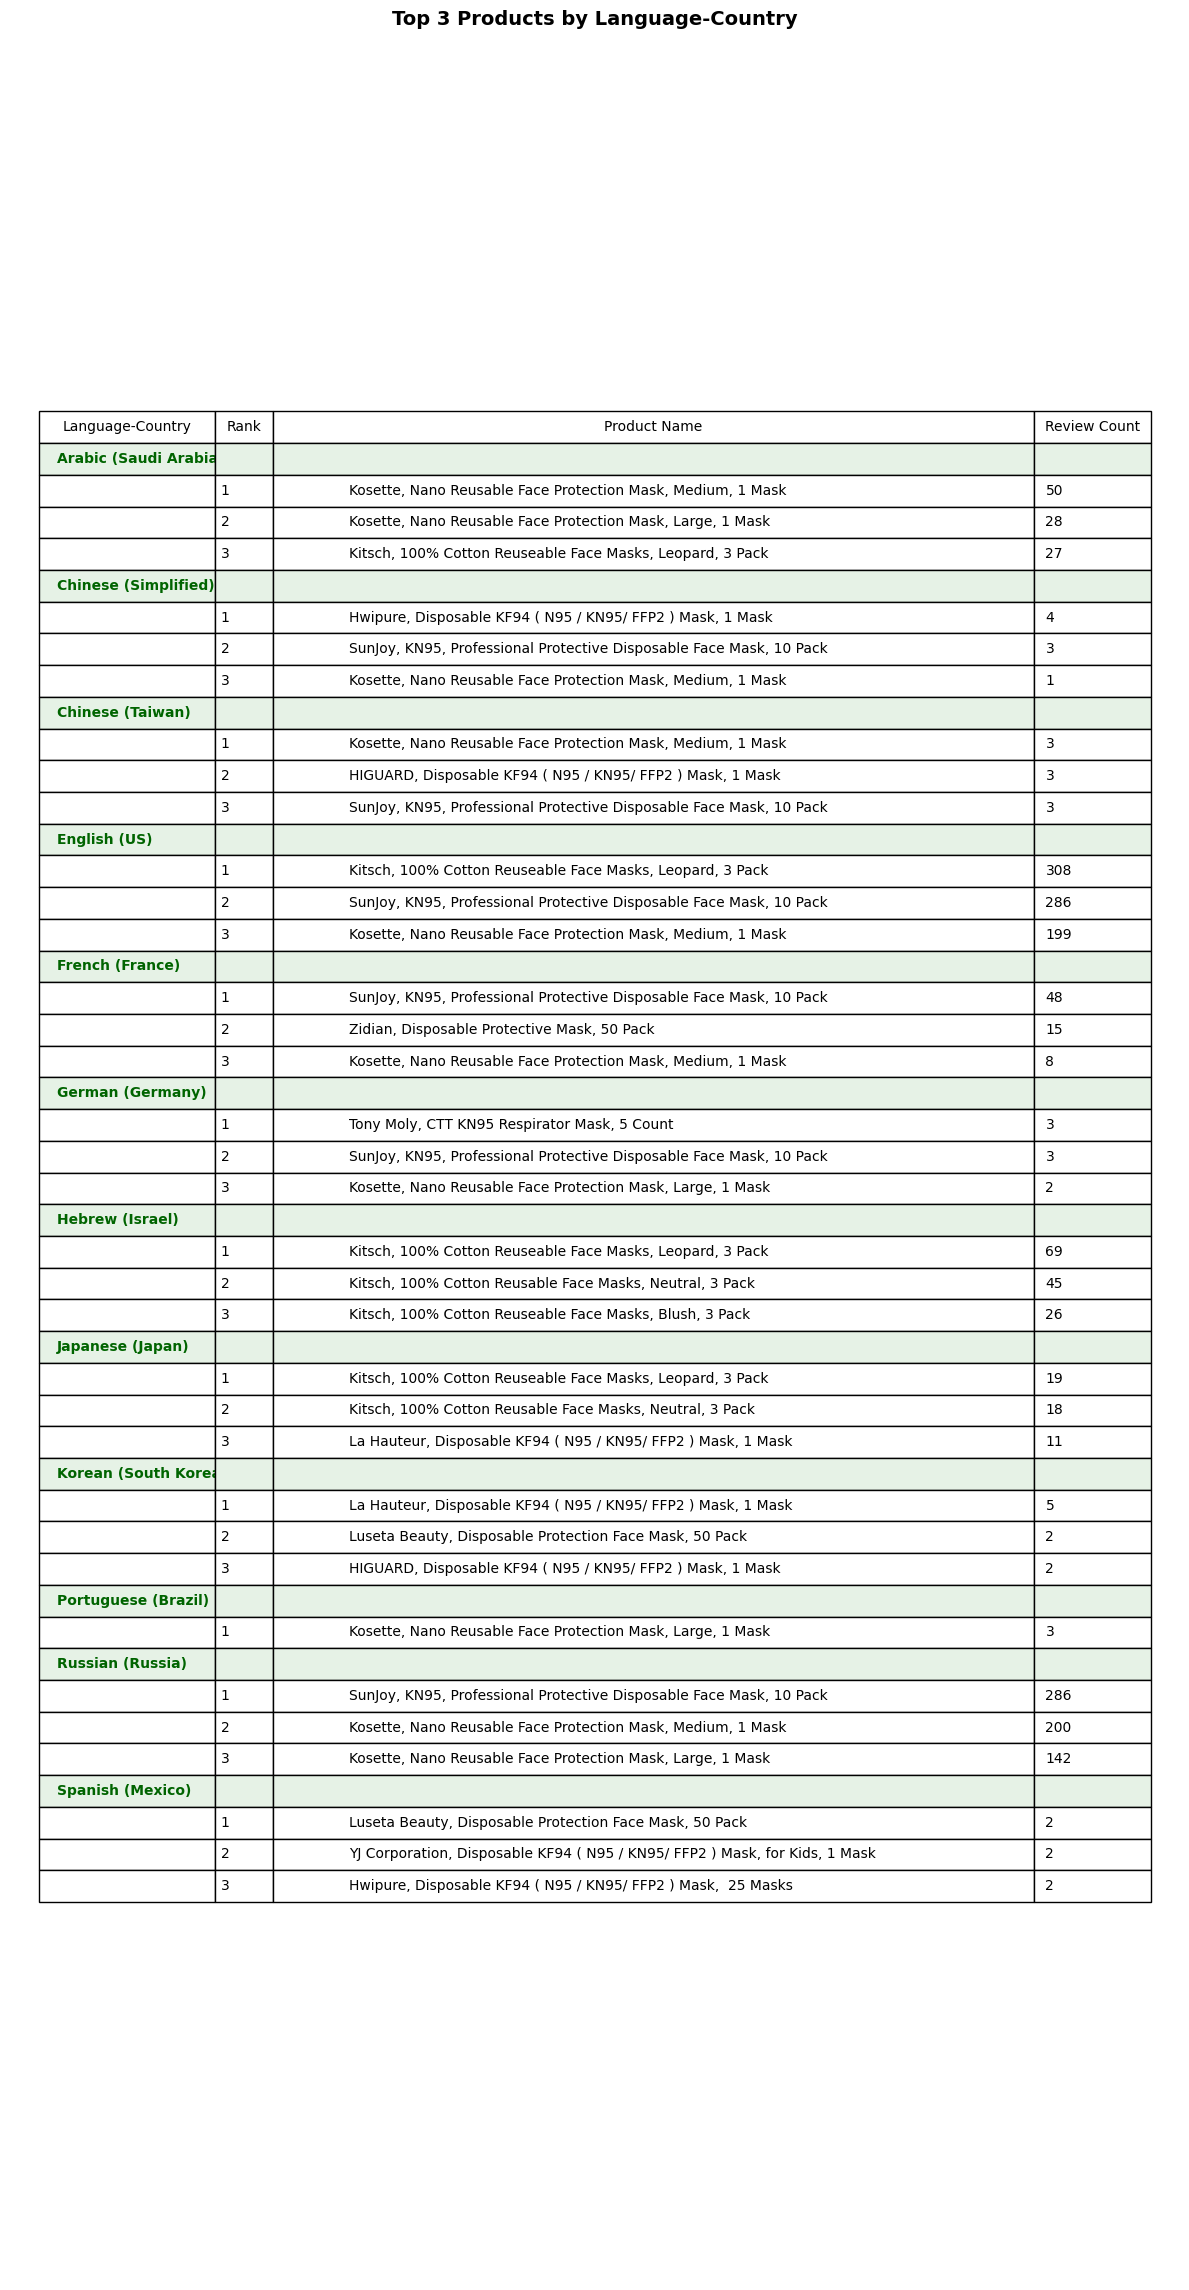

In [ ]:
top3_table['Display_Name'] = top3_table['languageCode'].map(lang_map).fillna(top3_table['languageCode'])
top3_table = top3_table.sort_values(['Display_Name', 'rank']).reset_index(drop=True)
lines = []

for lang in top3_table['Display_Name'].unique():
    lines.append([lang, '', '', ''])  # Header row
    subset = top3_table[top3_table['Display_Name'] == lang]
    for _, row in subset.iterrows():
        lines.append(['', row['rank'], row['product_name'], row['review_count']])

fig, ax = plt.subplots(figsize=(12, len(lines) * 0.5))
ax.axis('off')

table = ax.table(
    cellText=lines,
    colLabels=['Language-Country', 'Rank', 'Product Name', 'Review Count'],
    cellLoc='left',
    loc='center'
)

col_widths = [0.15, 0.05, 0.65, 0.1]
for col_idx, width in enumerate(col_widths):
    for row_idx in range(len(lines) + 1):
        try:
            cell = table[row_idx, col_idx]
            cell.set_width(width)
        except KeyError:
            continue

for i, row in enumerate(lines):
    if row[0]:
        for j in range(4):
            cell = table[i + 1, j]
            cell.set_text_props(weight='bold', color='darkgreen')
            cell.set_facecolor('#e6f2e6')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title('Top 3 Products by Language-Country', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
rev['helpfulNo'].value_counts()

,count
helpfulNo,
0,3711
1,100
2,24
3,8
4,2
6,2
5,1
9,1


In [ ]:
rev['helpfulYes'].value_counts()

,count
helpfulYes,
0,3188
1,384
2,129
3,33
4,21
5,18
6,16
8,8
10,6


In [ ]:
total_helpful = rev[rev['helpfulYes'] > 0].shape[0]
print(total_helpful)

661


In [ ]:
total_not_helpful = rev[rev['helpfulNo'] > 0].shape[0]
print(total_not_helpful)

138
